## Part 1 & 2
> - What is the highest y position it reaches on this trajectory?
> - How many distinct initial velocity values cause the probe to be within the target area after any step?

x_t=17, y_t=124, success=True, max_height=7750, valid_vects=4120


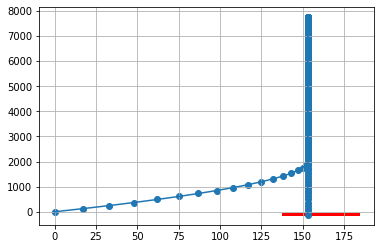

In [12]:
import re
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.ndimage.filters import gaussian_filter1d
from itertools import product

# Parse input to binary string
target = {k:int(v) for k,v in re.search(r"x=(?P<x1>-?\d+)..(?P<x2>-?\d+), y=(?P<y1>-?\d+)..(?P<y2>-?\d+)", open("input.txt").read()).groupdict().items()}


def calc_curve(_velo: tuple[int,int], _target: dict, _points: list) -> tuple[bool, int, list[tuple[int,int]]]:
    curr_pos = _points[-1]
    new_pos = (curr_pos[0]+_velo[0], curr_pos[1]+_velo[1])
    _points.append(new_pos)
    if _target["x1"] <= new_pos[0] <= _target["x2"] and _target["y1"] <= new_pos[1] <= _target["y2"]:
        return (True, max([y for x, y in _points]), _points)
    elif new_pos[0] > _target["x2"] or new_pos[1] < _target["y1"]:
        return (False, max([y for x, y in _points]), _points)
    else:
        return calc_curve((max(_velo[0]-1,0),_velo[1]-1), _target, _points)


def optimize(target: dict) -> tuple[tuple[int,int], list]:    
    valid_pairs = [(x,y,calc_curve((x,y), target, [(0,0)])[1]) for x, y in product(range(min(target["y1"],target["y2"]),max(target["x1"],target["x2"])+1),repeat=2) if calc_curve((x,y), target, [(0,0)])[0]]    
    return max(valid_pairs, key = lambda t: t[2])[:2], valid_pairs


# Print result
opt, valid_vects = optimize(target)
x_t, y_t = opt
success, max_height, points = calc_curve((x_t,y_t), target, [(0,0)])

print(f"{x_t=}, {y_t=}, {success=}, {max_height=}, valid_vects={len(valid_vects)}")

# Plot curve
x, y = tuple(zip(*points))
fig, ax = plt.subplots()
ax.add_patch(patches.Rectangle((target["x1"], target["y1"]), 
                                target["x2"]-target["x1"], 
                                target["y2"]-target["y1"], 
                                linewidth=2, 
                                edgecolor='#FF0000', 
                                facecolor='#FFB6C1'))
ysmoothed = gaussian_filter1d(y, sigma=0.01)
plt.plot(x, ysmoothed)
ax.scatter (x, y)
ax.grid()